#**Comparing Nutrition Facts of Menu in The Two Biggest Fast Food Restaurants in Indonesia : McDonalds and KFC**


Data Source

> Nutrition Facts McDonalds Data

https://www.fatsecret.co.id/kalori-gizi/search?q=mcdonald%27s



> Nutrition Facts KFC Data

https://www.fatsecret.co.id/kalori-gizi/search?q=kfc


**About the Dataset**

This dataset is a result of scraping from a source (you can check the scraping code in the `scraping.py` file) that gives nutrition facts information of two well-known fast food restaurants in Indonesia, which are: McDonalds and KFC. There are information about total energy, calory, carbohidrate, protein, and fat of one portion of each menu at those restaurants. 

This dataset will be used to compare nutrition facts of McDonalds' menu and KFC's menu. The result of this analysis can be useful both for the consumers and restaurants' owners. For consumers, they can choose which menu from which restaurant are best suited with their preference of nutrition contents. On the other hand, for restaurants' owners, they can understand more about the nutrition contents of their menu and their competitor's menu and later on they can adjust their nutrition content in order to win the market competition.



**Research Purposes**

1. Cluster the menu of the two restaurants based on their nutrition facts.

2. Use dimensional reduction in order to see whether the projected new dimensions can create clear boundaries between the clusters.

3. Compare the mean of calory and fat contents of menu in KFC and McDonalds, and see whether there is a significant difference.

4. Further analyze the difference between the mean of calory and fat contents of menu in KFC and McDonalds.

**Statistic Methodologies**

1. **Hierarchical Agglomerative Method** to cluster the menu based on the nutrition facts. This method is chosen because the researcher doesn't have preference of the number of clusters.
2. **Principal Component Analysis** to do the dimensional reduction since all the variables are numerical variables.
3. **T Square's Hotelling** to do the multivariate inference whether there is a significance difference between the calory and fat contents of menu in KFC and McDonalds.
4. **Profile Analysis** to further analyze the difference between calory and fat contents of menu in KFC and McDonalds.

**Variables Explanation**

There are a lot of nutrition content data from the site, but to do this research we will only use the complete data (doesn't containing null values), which are:
* `Energi` : energy got from eating one portion of each menu
* `Kalori` : calories content of one portion of each menu
* `Lemak` : fat content of one portion of each menu
* `Protein` : protein content of one portion of each menu
* `Karbohidrat` : carbohidrate content of one portion of each menu

In [3]:
# Convert to HTML
# %%shell
# jupyter nbconvert --to html /content/Multivariate_Analysis.ipynb

[NbConvertApp] Converting notebook /content/Multivariate_Analysis.ipynb to html
[NbConvertApp] Writing 859596 bytes to /content/Multivariate_Analysis.html


## Import Packages

In [ ]:
!pip install pingouin

     |████████████████████████████████| 206 kB 7.5 MB/s 
     |████████████████████████████████| 28.5 MB 51 kB/s 
     |████████████████████████████████| 9.5 MB 63.1 MB/s 
  Created wheel for pingouin: filename=pingouin-0.4.0-py3-none-any.whl size=206904 sha256=3444c2f18584c3a7d35e354e84562226b1d5f585b11f982b34ba805c68f72170
  Stored in directory: /root/.cache/pip/wheels/8a/9d/c4/11677c2c4d5c0df9d1d4aa61528d868bb96e13b898e3f51c95
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=cbe4a3f8f15e9254d973212861c81fa83750b50d866d2c586a3e86e35087bb6d
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmo

In [ ]:
# To tidy up data
import pandas as pd
import numpy as np
import seaborn as sns

# To normalize data
from sklearn.preprocessing import normalize

# To do multivariate inference
from scipy.stats import f,t,levene
import pingouin as pg
from sklearn import preprocessing

# To cluster data
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering as ac

# To visualize data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# To do the PCA
from sklearn.decomposition import PCA

# To use R
%load_ext rpy2.ipython

## Data Preprocessing

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import McDonalds data
df_mcd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multivariate Analysis/McDonalds.csv')

# Glimpse of the data
df_mcd.head()

,Unnamed: 0,Menu,Energi,Kalori,Lemak,Protein,Karbohidrat,Gula,Lemak Jenuh,Lemak Trans,Kolesterol,Serat,Sodium,Kalium,Lemak tak Jenuh Ganda,Lemak tak Jenuh Tunggal
0,0,Ayam Goreng Mcd Spicy,1130,270,16.2,17.9,13.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Beef Burger,1079,258,7.8,12.8,32.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Iced Lemon Tea,665,159,0.0,0.0,39.6,38.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Fried Chicken (Thigh),1381,330,17.0,28.0,16.0,0.0,35.0,0.0,85.0,0.0,740.0,0.0,NaN,NaN
4,4,McFlurry - Oreo,2176,520,17.0,12.0,80.0,64.0,9.0,0.5,45.0,1.0,260.0,NaN,NaN,NaN


In [ ]:
# Import KFC data
df_kfc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multivariate Analysis/KFC.csv')

# Glimpse of the data
df_kfc.head()

,Unnamed: 0,Menu,Energi,Kalori,Lemak,Lemak Jenuh,Lemak Trans,Kolesterol,Protein,Karbohidrat,Serat,Gula,Sodium,Kalium,Lemak tak Jenuh Ganda,Lemak tak Jenuh Tunggal
0,0,Dada Ayam,2176,520,34.0,5.0,0.0,145.0,36.00,0.00,0.0,0.00,1220.0,0.0,NaN,NaN
1,1,Rice,1122,268,0.3,NaN,NaN,NaN,6.80,59.57,NaN,1.27,27.0,NaN,NaN,NaN
2,2,Paha Bawah Crispy,711,170,12.0,NaN,NaN,NaN,10.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Perkedel,439,105,5.0,NaN,NaN,NaN,5.39,9.60,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Dada Ayam Original,1632,390,21.0,NaN,NaN,NaN,39.00,11.00,2.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check data type and missing values of McDonalds
df_mcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               50 non-null     int64  
 1   Menu                     50 non-null     object 
 2   Energi                   50 non-null     int64  
 3   Kalori                   50 non-null     int64  
 4   Lemak                    50 non-null     float64
 5   Protein                  50 non-null     float64
 6   Karbohidrat              50 non-null     float64
 7   Gula                     29 non-null     float64
 8   Lemak Jenuh              31 non-null     float64
 9   Lemak Trans              17 non-null     float64
 10  Kolesterol               34 non-null     float64
 11  Serat                    33 non-null     float64
 12  Sodium                   29 non-null     float64
 13  Kalium                   7 non-null      float64
 14  Lemak tak Jenuh Ganda    2 n

In [ ]:
# Check data type and missing values KFC
df_kfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               39 non-null     int64  
 1   Menu                     39 non-null     object 
 2   Energi                   39 non-null     int64  
 3   Kalori                   39 non-null     int64  
 4   Lemak                    39 non-null     float64
 5   Lemak Jenuh              27 non-null     float64
 6   Lemak Trans              8 non-null      float64
 7   Kolesterol               23 non-null     float64
 8   Protein                  39 non-null     float64
 9   Karbohidrat              39 non-null     float64
 10  Serat                    15 non-null     float64
 11  Gula                     27 non-null     float64
 12  Sodium                   30 non-null     float64
 13  Kalium                   6 non-null      float64
 14  Lemak tak Jenuh Ganda    3 n

There are a lot of missing values from the variables except `Menu`, `Energi`, `Kalori`, `Lemak`, `Protein`, `Karbohidrat`. It's impossible to impute the missing values using backward or forward imputation since the nutrition contents of each menu are different. So we will only use these variables in this research.

In [ ]:
# Take the variables
df_mcd = df_mcd[['Menu','Energi', 'Kalori', 'Lemak', 'Protein', 'Karbohidrat']]
df_kfc = df_kfc[['Menu','Energi', 'Kalori', 'Lemak', 'Protein', 'Karbohidrat']]

In [ ]:
# Add restaurant name 
df_mcd['Menu'] = [x + " Mcd" for x in df_mcd['Menu']]
df_kfc['Menu'] = [x + " KFC" for x in df_kfc['Menu']]

In [ ]:
# Combine the two data frames
df_combined = pd.concat([df_mcd, df_kfc], axis = 0).reset_index(drop=True)

# Glimpse of the data
df_combined.head()

,Menu,Energi,Kalori,Lemak,Protein,Karbohidrat
0,Ayam Goreng Mcd Spicy Mcd,1130,270,16.2,17.9,13.1
1,Beef Burger Mcd,1079,258,7.8,12.8,32.1
2,Iced Lemon Tea Mcd,665,159,0.0,0.0,39.6
3,Fried Chicken (Thigh) Mcd,1381,330,17.0,28.0,16.0
4,McFlurry - Oreo Mcd,2176,520,17.0,12.0,80.0


## Exploratory Data Analysis

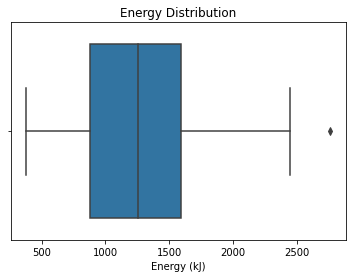

In [ ]:
# Energy Distribution
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x = "Energi", data = df_combined)
ax.set(xlabel="Energy (kJ)")
plt.title("Energy Distribution");

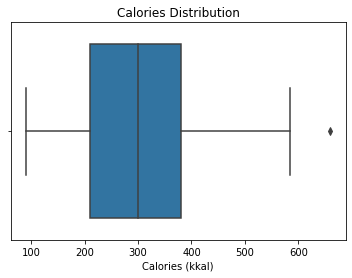

In [ ]:
# Calories Distribution
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x = "Kalori", data = df_combined)
ax.set(xlabel="Calories (kkal)")
plt.title("Calories Distribution");

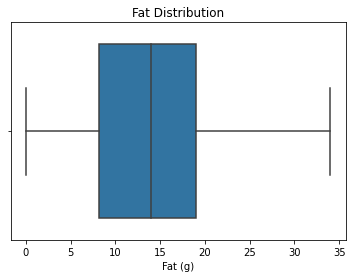

In [ ]:
# Fat Distribution
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x = "Lemak", data = df_combined)
ax.set(xlabel="Fat (g)")
plt.title("Fat Distribution");

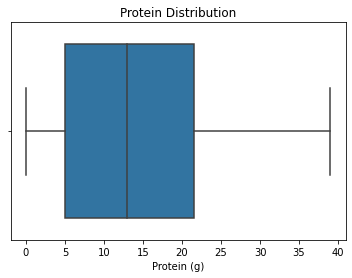

In [ ]:
# Protein Distribution
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x = "Protein", data = df_combined)
ax.set(xlabel="Protein (g)")
plt.title("Protein Distribution");

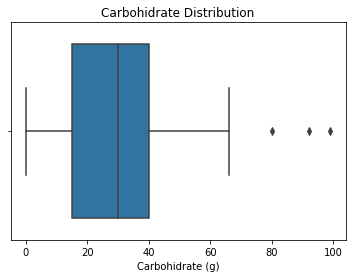

In [ ]:
# Carbohidrate Distribution
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x = "Karbohidrat", data = df_combined)
ax.set(xlabel="Carbohidrate (g)")
plt.title("Carbohidrate Distribution");

All of the nutrition content distributions are tend to be positively skewed. Some of the menu contain high nutrition contents while most of the menu contain relatively low nutrition contents. There are some outliers in the data but we do not remove them since we have a relatively small number of data and we just want to use all of the data. 

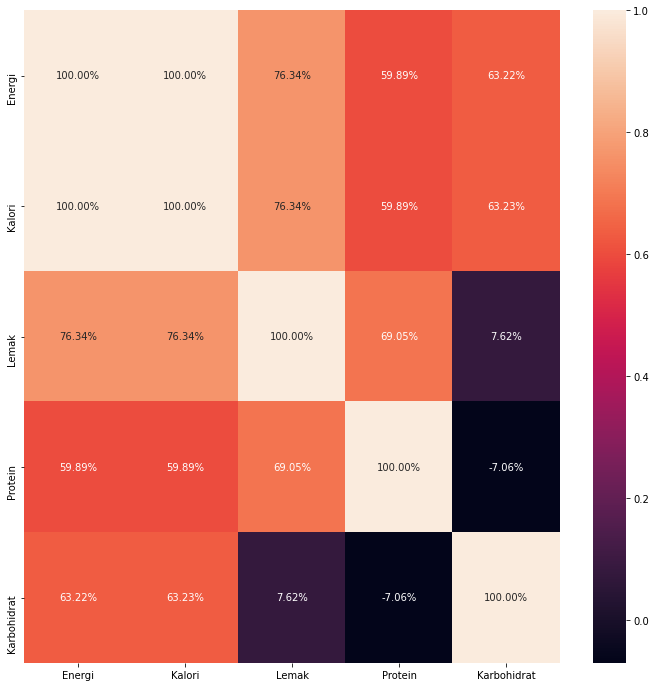

In [ ]:
# Correlation Plot
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_combined.iloc[:,1:].corr(), annot=True, fmt='.2%')
plt.show()

Since energy and calories have 100% correlation, we wil drop energy since calories is more considered for a meal diet program or other programs than energy.

In [ ]:
# Drop energy
df_combined.drop('Energi', axis = 1, inplace = True)
df_kfc.drop('Energi', axis = 1, inplace = True)
df_mcd.drop('Energi', axis = 1, inplace = True)

## Clustering

### Clustering Data

In [ ]:
# Copy combined data
df_cluster = df_combined.copy()

In [ ]:
# Scaling data
menu = df_cluster['Menu']
df_scaled = normalize(df_cluster.iloc[:,1:])
df_scaled = pd.DataFrame(df_scaled, columns=df_cluster.columns[1:])
df_scaled.head()

,Kalori,Lemak,Protein,Karbohidrat
0,0.994865,0.059692,0.065956,0.048269
1,0.990704,0.029952,0.049151,0.123262
2,0.970358,0.000000,0.000000,0.241674
3,0.993953,0.051204,0.084335,0.048192
4,0.987600,0.032287,0.022791,0.151938


### First Trial

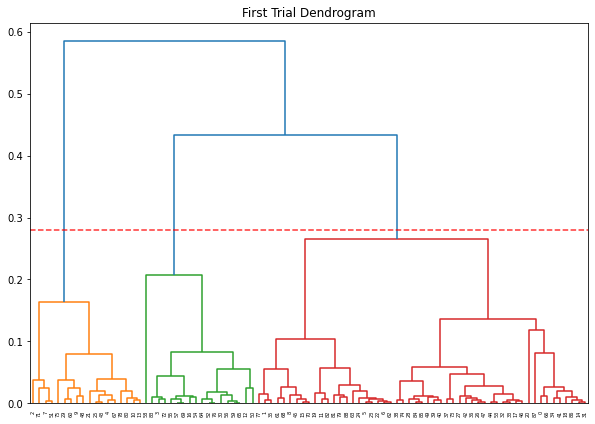

In [ ]:
# Determine number of clusters
plt.figure(figsize = (10,7))
plt.title('First Trial Dendrogram')
plt.axhline(y = 0.28, linestyle = '--', color = 'red', alpha = 0.8)
dend = shc.dendrogram(shc.linkage(df_scaled, method= 'ward'))

From the dendrogram, we decide to try using **3 clusters**.

In [ ]:
# Cluster the data
cluster = ac(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(df_scaled)

array([0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2,
       0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       0])

In [ ]:
# Combine the cluster into the table
df_cluster1 = df_cluster.copy()
df_cluster1['Cluster'] = cluster.labels_ + 1

# Example of Cluster (Cluster 1)
df_cluster1[df_cluster1['Cluster']==1]

,Menu,Kalori,Lemak,Protein,Karbohidrat,Cluster
0,Ayam Goreng Mcd Spicy Mcd,270,16.20,17.90,13.10,1
1,Beef Burger Mcd,258,7.80,12.80,32.10,1
5,French Fries (Small) Mcd,230,11.00,3.00,29.00,1
6,French Fries (Medium) Mcd,373,17.60,4.10,48.70,1
8,Cheeseburger Mcd,300,12.00,15.00,33.00,1
11,Double Choco Pie Mcd,241,13.00,3.00,26.00,1
14,McNuggets (6) Mcd,270,16.00,15.00,16.00,1
15,McSpicy Chicken Mcd,585,26.00,23.00,65.00,1
17,McSpicy Chicken Burger Mcd,522,25.00,24.00,50.00,1
18,Spicy Chicken Bites Mcd,270,17.00,14.00,18.00,1


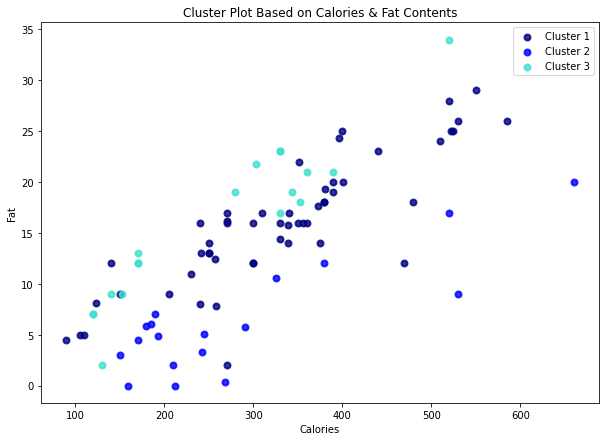

In [ ]:
# Plot Cluster based on Kalori & Lemak
cluster_value = cluster.labels_
cluster_label = ['Cluster '+ str(i) for i in range(1,4)]
colors = ['navy', 'blue', 'turquoise']
lw = 2

plt.figure(figsize = (10,7))
plt.title('Cluster Plot Based on Calories & Fat Contents')
for color, i, clust in zip(colors, [1,2,3], cluster_label):
  plt.scatter(df_cluster1[df_cluster1['Cluster']==i]['Kalori'], df_cluster1[df_cluster1['Cluster']==i]['Lemak'], color = color, alpha = 0.8, lw = lw, label = clust)
plt.xlabel('Calories')
plt.ylabel('Fat')
plt.legend();

#### Cluster Characteristics Analysis

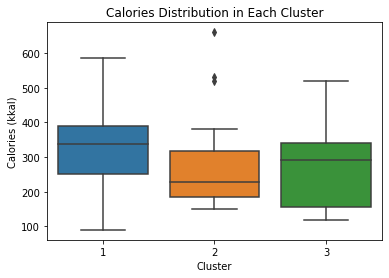

In [ ]:
# Calories Distribution
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x="Cluster", 
            y="Kalori",
            data = df_cluster1)
ax.set(ylabel="Calories (kkal)")
plt.title("Calories Distribution in Each Cluster")
plt.show()

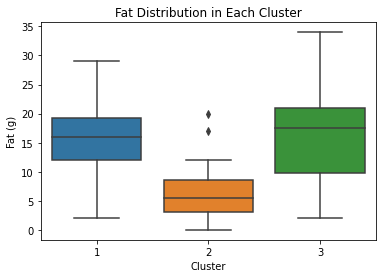

In [ ]:
# Fat Distribution
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x="Cluster", 
            y="Lemak",
            data = df_cluster1)
ax.set(ylabel="Fat (g)")
plt.title("Fat Distribution in Each Cluster")
plt.show()

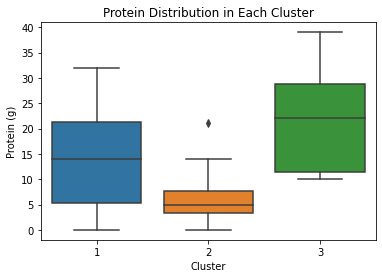

In [ ]:
# Protein Distribution
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x="Cluster", 
            y="Protein",
            data = df_cluster1)
ax.set(ylabel="Protein (g)")
plt.title("Protein Distribution in Each Cluster")
plt.show()

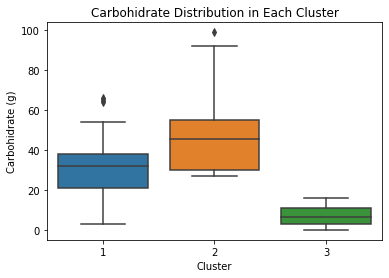

In [ ]:
# Karbohidrat Distribution
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x="Cluster", 
            y="Karbohidrat",
            data = df_cluster1)
ax.set(ylabel="Carbohidrate (g)")
plt.title("Carbohidrate Distribution in Each Cluster")
plt.show()

### Second Trial

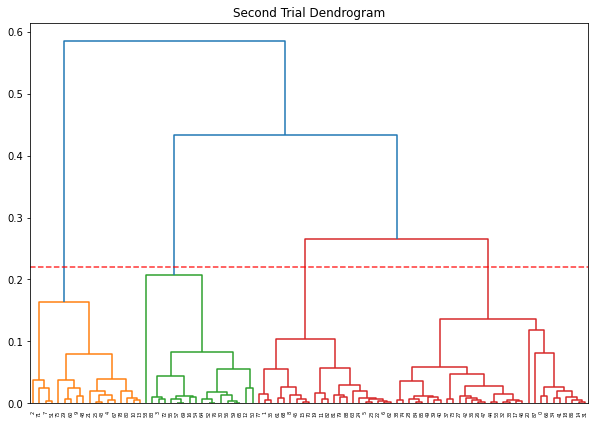

In [ ]:
# Determine number of clusters
plt.figure(figsize = (10,7))
plt.title('Second Trial Dendrogram')
plt.axhline(y = 0.22, linestyle = '--', color = 'red', alpha = 0.8)
dend = shc.dendrogram(shc.linkage(df_scaled, method= 'ward'))

From the dendrogram, we decide to try using **4 clusters**.

In [ ]:
# Cluster the data
cluster2 = ac(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
cluster2.fit_predict(df_scaled)

array([2, 3, 1, 0, 1, 3, 3, 1, 3, 1, 1, 3, 0, 1, 2, 3, 0, 2, 2, 3, 2, 1,
       3, 3, 3, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 3, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 0, 0,
       2, 1, 3, 0, 3, 1, 0, 2, 2, 1, 0, 3, 1, 3, 1, 3, 3, 0, 2, 2, 2, 2,
       3])

In [ ]:
# Combine the cluster into the table
df_cluster2 = df_cluster.copy()
df_cluster2['Cluster'] = cluster2.labels_ + 1

# Example of Cluster (Cluster 1)
df_cluster2[df_cluster2['Cluster']==2][['Menu','Cluster']]

,Menu,Cluster
2,Iced Lemon Tea Mcd,2
4,McFlurry - Oreo Mcd,2
7,Rice Mcd,2
9,McFlurry - Choco Mcd,2
10,Ice Cream Cone Mcd,2
13,Bubur Ayam Mcd,2
21,Iced Coffee Mcd,2
25,Chocolate Sundae Mcd,2
29,Strawberry Sundae Mcd,2
43,Choco Top Mcd,2


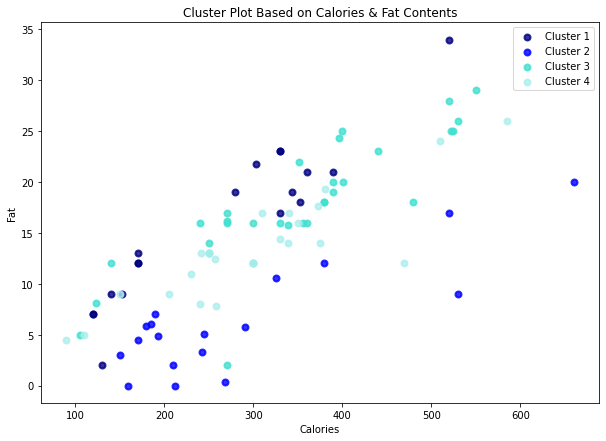

In [ ]:
# Plot Cluster based on Calories & Fat
cluster_value2 = cluster2.labels_
cluster_label2 = ['Cluster '+ str(i) for i in range(1,5)]
colors2 = ['navy', 'blue', 'turquoise', 'paleturquoise']
lw = 2

plt.figure(figsize = (10,7))
plt.title('Cluster Plot Based on Calories & Fat Contents')
for color, i, clust in zip(colors2, [1,2,3,4], cluster_label2):
  plt.scatter(df_cluster2[df_cluster2['Cluster']==i]['Kalori'], df_cluster2[df_cluster2['Cluster']==i]['Lemak'], color = color, alpha = 0.8, lw = lw, label = clust)
plt.xlabel('Calories')
plt.ylabel('Fat')
plt.legend();

#### Cluster Characteristics Analysis

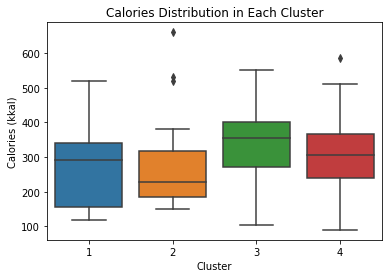

In [ ]:
# Calories Distribution
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x="Cluster", 
            y="Kalori",
            data = df_cluster2)
ax.set(ylabel="Calories (kkal)")
plt.title("Calories Distribution in Each Cluster")
plt.show()

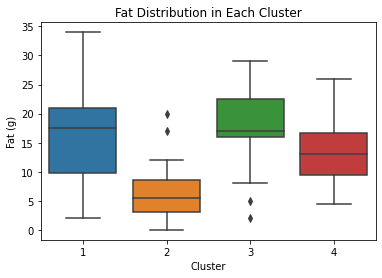

In [ ]:
# Fat Distribution
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x="Cluster", 
            y="Lemak",
            data = df_cluster2)
ax.set(ylabel="Fat (g)")
plt.title("Fat Distribution in Each Cluster")
plt.show()

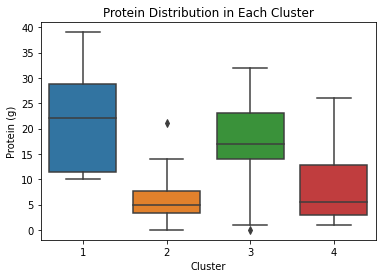

In [ ]:
# Protein Distribution
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x="Cluster", 
            y="Protein",
            data = df_cluster2)
ax.set(ylabel="Protein (g)")
plt.title("Protein Distribution in Each Cluster")
plt.show()

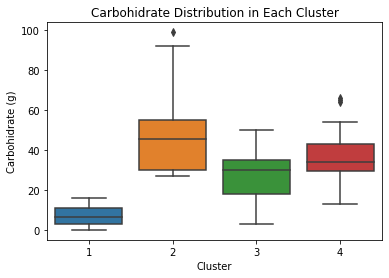

In [ ]:
# Carbohidrate Distribution
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x="Cluster", 
            y="Karbohidrat",
            data = df_cluster2)
ax.set(ylabel="Carbohidrate (g)")
plt.title("Carbohidrate Distribution in Each Cluster")
plt.show()

Comparing the cluster characteristics analysis and clusters' members between two trials, we decide to use **4 clusters**. However the boundaries between clusters are not clear enough when we plot it using calories and fat, therefore we will try to use PCA and see whether the projected lower dimensions create a clearer boundaries between each cluster.

## PCA

In [ ]:
# PCA
pca = PCA(random_state = 100)
pca_fitted = pca.fit(df_scaled)
X_r = pca_fitted.transform(df_scaled)

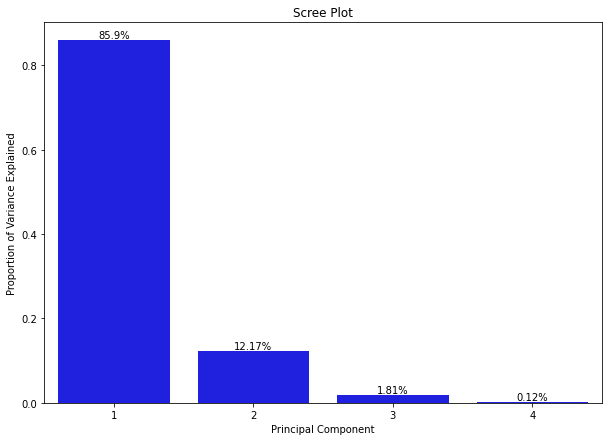

In [ ]:
# Scree Plot
PC_values = np.arange(pca_fitted.n_components_) + 1
plt.figure(figsize=(10, 7))
sns.barplot(x = PC_values, y = pca_fitted.explained_variance_ratio_,color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
for i in range(len(pca_fitted.explained_variance_ratio_)):
    plt.annotate(str(round(pca_fitted.explained_variance_ratio_[i]*100,2))+"%", xy=(PC_values[i]-1, pca_fitted.explained_variance_ratio_[i]), ha='center', va='bottom')
plt.show();

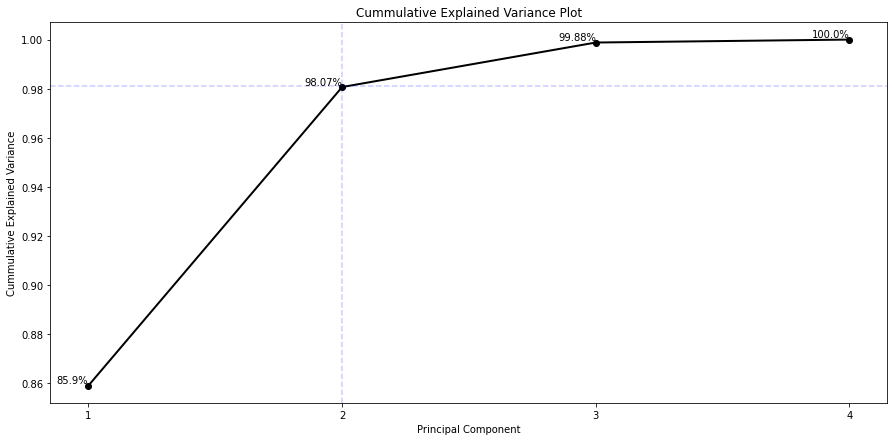

In [ ]:
# Cummulative Explained Variance
cumsum = np.cumsum(pca_fitted.explained_variance_ratio_)

# Cummulative Explained Variance Ratio Plot
plt.figure(figsize=(15, 7))
plt.plot(PC_values, cumsum,'ro-', linewidth=2, color = 'black')
plt.axhline(y = 0.981, color = 'b', linestyle = 'dashed', alpha = 0.2)
plt.axvline(x = 2, color = 'b', linestyle = 'dashed', alpha = 0.2)
plt.title('Cummulative Explained Variance Plot')
plt.xticks(PC_values)
plt.xlabel('Principal Component')
plt.ylabel('Cummulative Explained Variance')
for i in range(len(pca_fitted.explained_variance_ratio_)):
    plt.annotate(str(round(cumsum[i]*100,2))+"%", xy=(PC_values[i], cumsum[i]), ha='right', va='bottom')
plt.show();

We will only use **2 principal components** since it has explained 98.07% variance of the original data.



In [ ]:
# Eigen values
eigen_value = pca_fitted.explained_variance_
eigen_value = pd.DataFrame(eigen_value).transpose()
eigen_value.columns = ['Eigen Value ' + str(i) for i in range(1,5)]
eigen_value

,Eigen Value 1,Eigen Value 2,Eigen Value 3,Eigen Value 4
0,0.003744,0.00053,0.000079,0.000005


In [ ]:
# Eigen vectors
eigen_vector = pd.DataFrame(pca_fitted.components_.T, columns = ["Eigen Vector " + str(i) for i in range(1,5)])
eigen_vector

,Eigen Vector 1,Eigen Vector 2,Eigen Vector 3,Eigen Vector 4
0,-0.061565,-0.125332,-0.012711,-0.990121
1,-0.211514,-0.394993,-0.890887,0.074588
2,-0.396450,0.865156,-0.296247,-0.081060
3,0.891235,0.282449,-0.344089,-0.086752


In [ ]:
# Principal components equations
for i in range(0,4):
  y = "PC_" + str(i+1) + "="
  eig = str(round(eigen_vector.iloc[0,i],4)) + df_scaled.columns[0]
  for j in range(1,4):
      if eigen_vector.iloc[j,i] >= 0:
        eig = eig + " + " + str(round(eigen_vector.iloc[j,i],4)) + df_scaled.columns[j]
      else:
        eig = eig + " - " + str(abs(round(eigen_vector.iloc[j,i],4))) + df_scaled.columns[j]
  print(y, eig)

PC_1= -0.0616Kalori - 0.2115Lemak - 0.3964Protein + 0.8912Karbohidrat
PC_2= -0.1253Kalori - 0.395Lemak + 0.8652Protein + 0.2824Karbohidrat
PC_3= -0.0127Kalori - 0.8909Lemak - 0.2962Protein - 0.3441Karbohidrat
PC_4= -0.9901Kalori + 0.0746Lemak - 0.0811Protein - 0.0868Karbohidrat


In [ ]:
# Calculate correlation
correlation = pca_fitted.components_.T * np.sqrt(pca_fitted.explained_variance_)

# Correlation Matrix
correlation_matrix = pd.DataFrame(correlation, columns=['PC'+str(i) for i in range(1,5)], index=df_scaled.columns)
correlation_matrix

,PC1,PC2,PC3,PC4
Kalori,-0.003767,-0.002886,-0.000113,-0.002266
Lemak,-0.012942,-0.009097,-0.007923,0.000171
Protein,-0.024257,0.019925,-0.002635,-0.000185
Karbohidrat,0.054531,0.006505,-0.003060,-0.000199


Interpretations : 
* First principal component is a contrast between protein and carbohidrate.
* Second principal component has a highest correlation with protein.

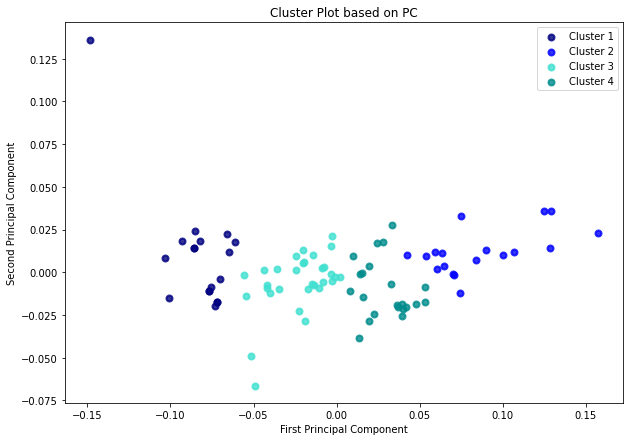

In [ ]:
# Plot clusters result using PCA
cluster_value2 = cluster2.labels_
cluster_label2 = ['Cluster '+ str(i) for i in range(1,5)]
colors2 = ['navy', 'blue', 'turquoise', 'darkcyan']
lw = 2

plt.figure(figsize=(10, 7))
for color, i, clust in zip(colors2, [0,1,2,3], cluster_label2):
  plt.scatter(X_r[cluster_value2 == i, 0], X_r[cluster_value2 == i, 1], color = color, alpha = 0.8, lw = lw, label = clust)

plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Cluster Plot based on PC');

Okay, it turns out that the PCs successfully seperate the clusters. We will try to see menu name of each cluster to draw the conclusion.

In [ ]:
result_cluster = df_cluster2[['Cluster','Menu']].sort_values('Cluster').reset_index(drop=True)
result_cluster['Restoran'] = [x.split()[-1] for x in result_cluster['Menu']]
result_cluster['Menu'] = [x.rsplit(' ', 1)[0] for x in result_cluster['Menu']]

In [ ]:
# Cluster 1
result_cluster[result_cluster['Cluster']==1].sort_values(['Restoran','Menu']).reset_index(drop=True)

,Cluster,Menu,Restoran
0,1,Chicken Breast Hot & Crispy,KFC
1,1,Chicken Breast Original Recipe,KFC
2,1,Chicken Drumstick Original Recipe,KFC
3,1,Chicken Wing Original Recipe,KFC
4,1,Crispy Chicken Thigh,KFC
5,1,Crispy Chicken Wing,KFC
6,1,Crispy Drumstick,KFC
7,1,Dada Ayam,KFC
8,1,Dada Ayam Original,KFC
9,1,Mini Chizza,KFC


In [ ]:
# Cluster 2
result_cluster[result_cluster['Cluster']==2].sort_values(['Restoran','Menu']).reset_index(drop=True)

,Cluster,Menu,Restoran
0,2,Colonel Yakiniku,KFC
1,2,Ice Cream Sundae,KFC
2,2,Japanese Teriyaki Bento,KFC
3,2,Mocha Float,KFC
4,2,Rice,KFC
5,2,Spaghetti Deluxe,KFC
6,2,Tropical Float,KFC
7,2,Bubur Ayam,Mcd
8,2,Choco Top,Mcd
9,2,Chocolate Sundae,Mcd


In [ ]:
# Cluster 3
result_cluster[result_cluster['Cluster']==3].sort_values(['Restoran','Menu']).reset_index(drop=True)

,Cluster,Menu,Restoran
0,3,Chicken Popcorn,KFC
1,3,Crispy Strip,KFC
2,3,Double Down Zinger Fillet Burger,KFC
3,3,Perkedel,KFC
4,3,Riser,KFC
5,3,Sambal Matah,KFC
6,3,Twisty,KFC
7,3,Zuper Krunch Burger,KFC
8,3,Ayam Goreng Mcd Spicy,Mcd
9,3,Big Breakfast,Mcd


In [ ]:
# Cluster 4
result_cluster[result_cluster['Cluster']==4].sort_values(['Restoran','Menu']).reset_index(drop=True)

,Cluster,Menu,Restoran
0,4,Burger Ayam (Colonel's Burger),KFC
1,4,Cheezy Wedges,KFC
2,4,Chocolate Molten Cake,KFC
3,4,Cream Soup,KFC
4,4,Deluxe Burger,KFC
5,4,Fish Fillet,KFC
6,4,French Blackpepper Bento,KFC
7,4,French Fries (Regular),KFC
8,4,Krushers,KFC
9,4,Sambal Korek,KFC


## Multivariate Inference

We want to test whether the mean of Fat and Calories contents between menu in McD is the same with KFC. We use T Square Hotelling's test to test the hypothesis.

Hypothesis:
* H0 : mean of Fat and Calories contents from McD menu - mean of Fat and Calories contents from KFC menu = 0

* H1 : mean of Fat and Calories contents from McD menu - mean of Fat and Calories contents from KFC menu != 0

### Multivariate Normality Test

Hypothesis:
* H0 : The data has multivariate normal distribution
* H1 : The data doesn't have multivariate normal distribution

In [ ]:
# Combined data frame
mcd = df_mcd[['Kalori','Lemak']]
kfc = df_kfc[['Kalori','Lemak']]
combined = df_combined[['Kalori', 'Lemak']]
pg.multivariate_normality(combined)

HZResults(hz=1.218680361029706, pval=0.009434616133613962, normal=False)

Since p-value < alpha = 0.05, reject H0. So, the data doesn't have multivariate normal distribution. We will try to normalize the data.

In [ ]:
# Scaled using normalize
scaled_combined = df_scaled[['Kalori','Lemak']]
pg.multivariate_normality(scaled_combined)

HZResults(hz=5.592761394088475, pval=1.2154576193010632e-11, normal=False)

In [ ]:
# Scaled using log
log_combined = np.log1p(combined)
pg.multivariate_normality(log_combined)

HZResults(hz=4.93434556356267, pval=1.294435082380596e-10, normal=False)

In [ ]:
# Scaled using exponential
exp_combined = combined**(1/1.2)
pg.multivariate_normality(exp_combined)

HZResults(hz=1.4038165637833873, pval=0.002980265822783597, normal=False)

In [ ]:
# Scaled using reciprocal
reciprocal_combined = 1/combined
pg.multivariate_normality(reciprocal_combined)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.7/dist-packages/pingouin/multivariate.py:76: RuntimeWarning: invalid value encountered in subtract
  difT = X - X.mean(0)


HZResults(hz=356, pval=1.527070983945526e-76, normal=False)

In [ ]:
# Scaled using square root
sqrt_combined=np.sqrt(combined)
pg.multivariate_normality(sqrt_combined)

HZResults(hz=2.5050967536307205, pval=5.526888534457944e-06, normal=False)

In [ ]:
# Scaled using min max scaler
scaler = preprocessing.MinMaxScaler()
minmax_combined = pd.DataFrame(scaler.fit_transform(combined), columns = ["Kalori", "Lemak"])
pg.multivariate_normality(minmax_combined)

HZResults(hz=1.2186803610297108, pval=0.009434616133613662, normal=False)

In [ ]:
# Write data to be read in R
combined.to_csv('combined.csv')
scaled_combined.to_csv('scaled_combined.csv')
log_combined.to_csv('log_combined.csv')
exp_combined.to_csv('exp_combined.csv')
reciprocal_combined.to_csv('reciprocal_combined.csv')
sqrt_combined.to_csv('sqrt_combined.csv')
minmax_combined.to_csv('minmax_combined.csv')

In [ ]:
# Mardia test package installation
%%R
install.packages('QuantPsyc')
library(QuantPsyc)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/QuantPsyc_1.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 48735 bytes (47 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [ ]:
# Mardia test for original data
%%R
data <- read.csv('combined.csv')
mult.norm(data)$mult.test

          Beta-hat      kappa       p-val
Skewness  1.717852 25.4814749 0.004503864
Kurtosis 14.550766 -0.3868804 0.698844780


In [ ]:
# Mardia test for scaled data
%%R
scaled_data <- read.csv('scaled_combined.csv')
mult.norm(scaled_data)$mult.test

          Beta-hat     kappa p-val
Skewness  9.981906 148.06495     0
Kurtosis 31.174618  13.92959     0


In [ ]:
# Mardia test for log data
%%R
log_data <- read.csv('log_combined.csv')
mult.norm(log_data)$mult.test

          Beta-hat     kappa        p-val
Skewness  6.087538 90.298475 4.662937e-15
Kurtosis 18.267446  2.813927 4.894039e-03


In [ ]:
# Mardia test for exp_combined data
%%R
exp_data <- read.csv('exp_combined.csv')
mult.norm(exp_data)$mult.test

          Beta-hat      kappa      p-val
Skewness  1.527793 22.6622681 0.01206424
Kurtosis 14.117255 -0.7602202 0.44712297


In [ ]:
# Mardia test for reciprocal data
%%R
reciprocal_data <- read.csv('reciprocal_combined.csv')
mult.norm(reciprocal_data)$mult.test

         Beta-hat kappa p-val
Skewness      NaN   NaN   NaN
Kurtosis      NaN   NaN   NaN


In [ ]:
# Mardia test for square root data
%%R
sqrt_data <- read.csv('sqrt_combined.csv')
mult.norm(sqrt_data)$mult.test

          Beta-hat      kappa        p-val
Skewness  3.026994 44.9004042 2.266566e-06
Kurtosis 15.524385  0.4516006 6.515568e-01


In [ ]:
# Mardia test for minmax_combined data
%%R
minmax_data <- read.csv('minmax_combined.csv')
mult.norm(exp_data)$mult.test

          Beta-hat      kappa      p-val
Skewness  1.527793 22.6622681 0.01206424
Kurtosis 14.117255 -0.7602202 0.44712297


Using exponential transformation or min max scaler, the mardia test result in greater than 0.01 p-values. Using assumption of alpha = 0.01, we do not reject H0, so the data has multivariate normal distribution. So we will use the result from min max scaler for further analysis.

### Same Variance Test using `levene` Package

Hypothesis:
* H0 :  all input samples are from populations with equal variances
* H1 :  all input samples are from populations with unequal variances

In [ ]:
# Calories
stat, pvalue = levene(df_mcd['Kalori'],df_kfc['Kalori'])
pvalue

0.22715190520720202

In [ ]:
# Fat
stat, pvalue = levene(df_mcd['Lemak'],df_kfc['Lemak'])
pvalue

0.6691412700499966

P-values of the levene tests are greater than alpha = 0.05, do not reject H0. So, based on levene test, the fat and calories content of menu from both restaurants are from population with equal variances.

### T Square's Hotelling Test - Equal Variance

In [ ]:
# Take min max scaler result
mcd.shape

(50, 2)

In [ ]:
kfc.shape

(39, 2)

In [ ]:
mcd_scaled = minmax_combined.iloc[:50,]
kfc_scaled = minmax_combined.iloc[50:90,]

In [ ]:
# Define the function to do T^2 hotelling
def t2hotelling(X, Y, alpha = 0.05):
  # Number of sample of first data (n1) & number of variables (p)
  n1, p = X.shape
  
  # Number of sample of second data (n2)
  n2, _ = Y.shape
  
  # Mean of first data (xbar1) - mean of second data (xbar2)
  delta = np.mean(X) - np.mean(Y)

  # Covariance matrix of first data (S1)
  S1 = np.cov(X, rowvar=False)

  # Covariance matrix of second data (S2)
  S2 = np.cov(Y, rowvar=False)

  # Pooled Covariance Matrix
  S_pooled = ((n1-1)*S1 + (n2-1)*S2)/(n1+n2-2)

  # T^2 Hotelling
  t_squared = np.matmul(np.matmul(delta.transpose(), np.linalg.inv((1/n1 + 1/n2) * S_pooled)), delta)
  
  # C^2
  F_table = f.ppf(1-alpha, p, n1+n2-p-1)
  c_squared = (n1+n2-2)*p/(n1+n2-p-1) * F_table
  
  # Conclusion
  ## Print T squared & C squared
  print(f"T Squared = {round(t_squared,5)} \nC Squared = {round(c_squared,5)}")
  ## If T squared > C squared reject H0
  if t_squared > c_squared:
    print("T Squared > C Squared, reject H0. So, there is a significant difference between the mean of the two data.")
  else:
    print("T Squared < C Squared, do not reject H0. So, there is no significant difference between the mean of the two data.")

In [ ]:
# Apply the function
t2hotelling(mcd_scaled, kfc_scaled)

T Squared = 2.93321 
C Squared = 6.27726
T Squared < C Squared, do not reject H0. So, there is no significant difference between the mean of the two data.


Based on the conclusion, there is no significant difference between mean of Fat and Calories contents of McD menu and KFC menu.


## Profile Analysis

To explore more about the difference between between mean of Fat and Calories contents of McD menu and KFC menu, we will try to do profile analysis. This method breakdown the questions from previous hypothesis into 3 questions:
* Are the profiles parallel? 
* Are the profiles the same (coincident)?
* Are the profiles flat?

We will do the test step by step from question 1 to question 3. If the answer of one of the questions is "no", then the test is stopped.

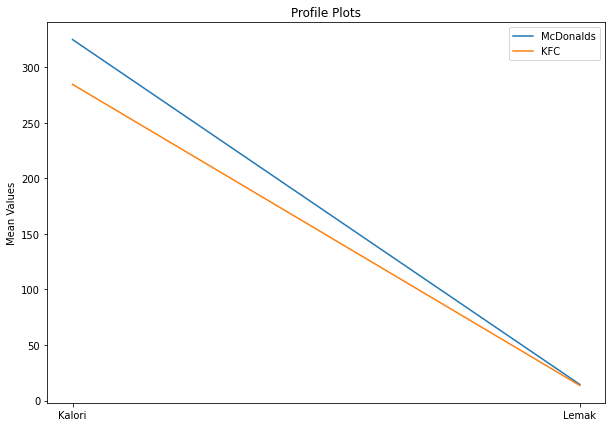

In [ ]:
# Profile Plots
plt.figure(figsize=(10,7))
plt.title('Profile Plots')
plt.plot(np.mean(mcd), label = 'McDonalds')
plt.plot(np.mean(kfc), label = 'KFC')
plt.ylabel('Mean Values')
plt.legend();

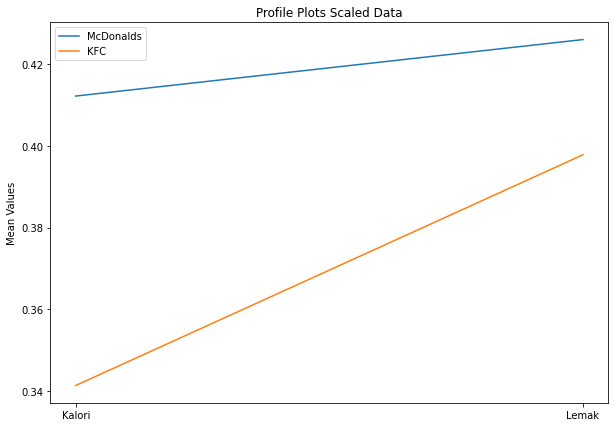

In [ ]:
# Profile Plots Scaled Data
plt.figure(figsize=(10,7))
plt.title('Profile Plots Scaled Data')
plt.plot(np.mean(mcd_scaled), label = 'McDonalds')
plt.plot(np.mean(kfc_scaled), label = 'KFC')
plt.ylabel('Mean Values')
plt.legend();

### Profile Test
**Question 1 : Are the profiles parallel?**

Hypothesis :
* H0 : The mean of `Kalori` and `Lemak` of McD menu are parallel with the mean of `Kalori` and `Lemak` of KFC menu.
* H1 : The mean of `Kalori` and `Lemak` of McD menu are not parallel with the mean of `Kalori` and `Lemak` of KFC menu.

**Question 2 : Are the profiles the same (coincident)?**

Hypothesis :
* H0 : The mean of `Kalori` and `Lemak` of McD menu are parallel and coincident with the mean of `Kalori` and `Lemak` of KFC menu.
* H1 : The mean of `Kalori` and `Lemak` of McD menu are parallel but not coincident with the mean of `Kalori` and `Lemak` of KFC menu.


**Question 3 : Are the profiles flat?**

Hypothesis :
* H0 : The mean of `Kalori` and `Lemak` of McD menu and KFC menu are all the same.
* H1 : The mean of `Kalori` and `Lemak` of McD menu and KFC menu are not completely same.



In [ ]:
def profile_analysis_test(contrast_matrix, X, Y, alpha = 0.05):
  # Number of sample of first data (n1) & number of variables (p)
  n1, p = X.shape

  # Number of sample of second data (n2)
  n2, _ = Y.shape

  # Mean of first data (xbar1) - mean of second data (xbar2)
  delta = np.mean(X) - np.mean(Y)

  # Covariance matrix of first data (S1)
  S1 = np.cov(X, rowvar=False)

  # Covariance matrix of second data (S2)
  S2 = np.cov(Y, rowvar=False)

  # Pooled Covariance Matrix
  S_pooled = ((n1-1)*S1 + (n2-1)*S2)/(n1+n2-2)

  # T^2 Hotelling
  Spooled_inverse = np.linalg.inv((1/n1 + 1/n2) * np.matmul(np.matmul(contrast_matrix, S_pooled), contrast_matrix.transpose()))
  t_squared = np.matmul(np.matmul(np.matmul(delta.transpose(), contrast_matrix.transpose()), Spooled_inverse), np.matmul(contrast_matrix,delta))

  # C^2
  F_table = f.ppf(1-alpha, p-1, n1+n2-p)
  c_squared = (n1+n2-2)*(p-1)/(n1+n2-p) * F_table

  # Conclusion
  ## Print T squared & C squared
  print(f"Parallel Test \nT Squared = {round(t_squared,5)} \nC Squared = {round(c_squared,5)}")
  ## If T squared > C squared reject H0
  if t_squared > c_squared:
    return print("T Squared > C Squared, reject H0. So, the profiles are not parallel, stop the test here.")
  else:
    print("T Squared < C Squared, do not reject H0. So, the profiles are parallel, continue to the next test.")
    
    # Coincident Test
    ## t test
    one_matrix = np.array([[1,1]]) 
    Spooled2 = (1/n1 + 1/n2) * np.matmul(np.matmul(one_matrix, S_pooled), one_matrix.transpose())
    t_test = np.matmul(one_matrix, delta)/(Spooled2**0.5) 
    t_table = t.ppf(1-alpha/2, n1+n2-2)

    ## Conclusion
    ### Print t test & t table
    print(f"\n\nCoincident Test \nt test = {round(t_test[0][0],5)} \nt table = {round(t_table,5)}")
    ### If t test > t table reject H0
    if t_test > t_table:
      return print("T test > t table, reject H0. So, the profiles are parallel but not coincident, stop the test here.")
    else:
      print("T test < t table, do not reject H0. So, the profiles are parallel and coincident, continue to the next test.")

      # Flat Test
      ## XY bar
      xy_bar = (n1*np.mean(X) + n2*np.mean(Y))/(n1 + n2)
      ## X-xybar
      delta_x = X-xy_bar
      ## Calculate total of (X-xy_bar) * transpose of (X-xy_bar)
      sum_x = 0
      for i in range(delta_x.shape[0]):
        result_x = np.matmul(delta_x.iloc[i,:],delta_x.iloc[i,:].transpose())
        sum_x += result_x
      ## Calculate total of (Y-xy_bar) * transpose of (Y-xy_bar)
      delta_y = Y-xy_bar
      sum_y = 0
      for i in range(delta_y.shape[0]):
        result_y = np.matmul(delta_y.iloc[i,:],delta_y.iloc[i,:].transpose())
        sum_y += result_y
      ## Calculate total sample covariance matrix (S)
      S = (1/(n1+n2-1))*(sum_x + sum_y)
      ## Statistic test
      S_inverse = np.linalg.inv(np.matmul(contrast_matrix*S, contrast_matrix.transpose()))
      statistic_test = (n1+n2)*np.matmul(np.matmul(np.matmul(np.matmul(xy_bar.transpose(),contrast_matrix.transpose()),S_inverse),contrast_matrix),xy_bar)
      ## F table
      F_table2 = (n1+n2-1)*(p-1)/(n1+n2-p+1) * f.ppf(1-alpha, p-1, n1+n2-p+1)
      ## Conclusion
      ### Print statistic test & F table
      print(f"\n\nFlat Test \nStatistic test = {round(statistic_test,5)} \nF table = {round(F_table2,5)}")
      ### If statistic test > F table reject H0
      if statistic_test > F_table2:
        return print("Statistic test > F table, reject H0. So, the profiles are parallel and coincident but not flat.")
      else:
        return print("Statistic test < F table, do not reject H0. So, the profiles are parallel, coincident, and flat.")


In [ ]:
# Define contrast matrix
contrast_matrix = np.array([[-1,1]])

# Apply the function
profile_analysis_test(contrast_matrix, mcd_scaled, kfc_scaled)

Parallel Test 
T Squared = 1.7252 
C Squared = 3.95059
T Squared < C Squared, do not reject H0. So, the profiles are parallel, continue to the next test.


Coincident Test 
t test = 1.11485 
t table = 1.98761
T test < t table, do not reject H0. So, the profiles are parallel and coincident, continue to the next test.


Flat Test 
Statistic test = 0.47826 
F table = 3.94932
Statistic test < F table, do not reject H0. So, the profiles are parallel, coincident, and flat.
